In [5]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@File    :   assignment_5_risk.ipynb
@Time    :   2024/10/30 12:05:58
@Author  :   Guillermo Martin
@Version :   1.0
@Personal email : gfmg1992@hotmail.com
@Student email: G00438885@atu.ie
@License :   (C)Copyright 2023, Guillermo Martin
@Desc    :   None
'''


'\n@File    :   assignment_5_risk.ipynb\n@Time    :   2024/10/30 12:05:58\n@Author  :   Guillermo Martin\n@Version :   1.0\n@Personal email : gfmg1992@hotmail.com\n@Student email: G00438885@atu.ie\n@License :   (C)Copyright 2023, Guillermo Martin\n@Desc    :   None\n'

In [6]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [7]:
battles = range(0,1000)
#len(battles)

#To store results
resf= np.zeros((len(battles),2))

In [8]:
# Defining army sizes randomly. We strictly set a maximum of 100 troops per army:
#a_army= rd.sample(range(1,100), 1)
#d_army= rd.sample(range(1,100), 1)

#while a_army or d_army > 0: 
for b in battles:
    # Random numbers...Sorted from high to low
    attackers = sorted(rd.sample(range(1,6), 3),reverse=True)
    defenders = sorted(rd.sample(range(1,6), 2),reverse=True)

    #One battle (dice comparison) per row
    res=np.array([[0,0],
                  [0,0]])
    
    # Attackers victories first column defender second column
    if attackers[0] > defenders[0]:
        res[0,0] = 1
    else:
        res[0,1] = 1

    if attackers[1] > defenders[1]:
        res[1,0] = 1
    else:
        res[1,1] = 1

    # Aggregate results   
    resf[b,]=sum(res)
    
print(resf)

[[1. 1.]
 [2. 0.]
 [2. 0.]
 ...
 [1. 1.]
 [0. 2.]
 [1. 1.]]


In [9]:
# Into pd dataframe for plotting
df=pd.DataFrame({"Results":sum(resf),
             "Players": ["Attackers","Defenders"]})	

Text(0.5, 1.0, 'Risk Battle Winning Percentages')

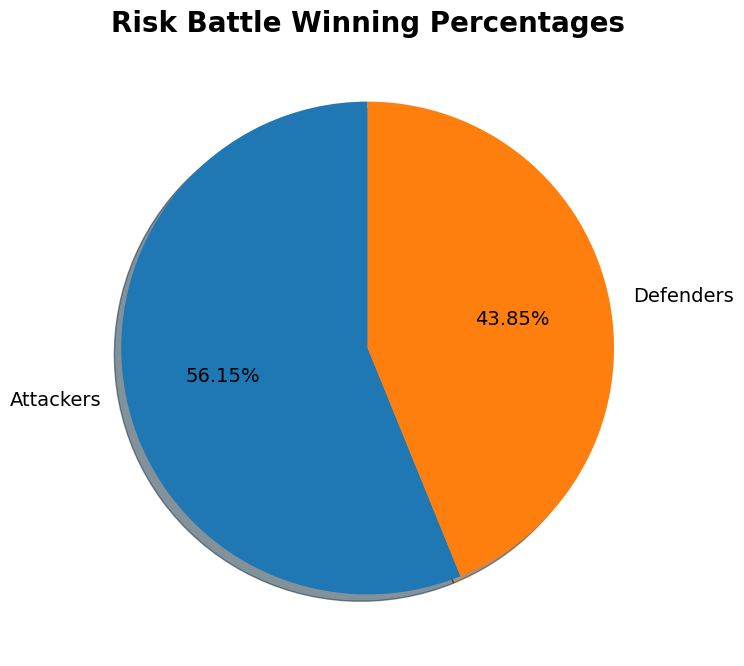

In [10]:
# Making a piechart
fig, ax = plt.subplots(figsize=(8,8)) 

ax.pie(df['Results'],labels=df['Players'], autopct='%1.2f%%', startangle=90,shadow=True,textprops={'fontsize': 14})
plt.title("Risk Battle Winning Percentages", fontweight="bold",fontdict={'fontsize': 20})